Transformation of Probability: Generating Distributions
======================================================

There are many times when it is useful to randomly generate a set of points that have a distribution (possibly in many dimensions) that is not uniform. In contrast, the typical pseudorandom number generator in a computer generates a uniform distribution (usually numbers spread evenly between 0 and 1). How can we use a uniform random generator to get a different distribution?

A common use case is to build up a 3D distribution of particles that has a given density distribution.

Definitions
-----------
*Random deviate*: A variable that takes on a random value drawn from a probability distribution function (PDF).
    Probability distribution $P(x)$ is defined such that $P(x)\, dx$ is the probability of drawing a value between $x$ and $x+dx$. Probability distributions are never negative, and are normalized so that
    $$ \int_{-\infty}^{+\infty} P(x)\, dx = 1 $$

*Uniform random deviate*: A random variate whose probability distribution is uniform between some minimum and maximum (typically 0 and 1), i.e.:
$$ P(\xi) = \left\{ \begin{array}{ll}1 & 0 \leq \xi < 1 \\ 0 & \text{otherwise}\end{array} \right. $$
I generally use $\xi$ specifically for the uniform random deviate given above, which is what typically comes out of a random number generator.

Outline
-------
The basic idea with transforming between probability distributions is to imagine that you sort all of the values you might draw from each distribution, and map them onto each other by sorted order. I.e. the smallest value from distribution A should transform into the smallest value from distribution B, the 25th percentile value from distribution A should transform into the 25th percentile value from distribution B, the median value from distribution A should transform into the median value from distribution B, etc.

The percentile value is also the cumulative probability -- e.g. the probability of finding a value less than or equal to the 25th percentile value is 25%! So transformation of probability is equivalent to *matching the cumulative distribution functions* (CDFs).

The cumulative probability ${\cal P}$ is simply the integral of the probability $P$:
$$ {\cal P}(<x) = \int_{-\infty}^x P(x')\, dx' $$
So if we want to convert between a random deviate $x$ which has a PDF $f(x)$, and a random deviate $y$ which has a PDF $g(y)$, it comes down to solving for the relation between $x$ and $y$ which satisfies
$$ \int_{-\infty}^x f(x')\, dx' = \int_{-\infty}^y g(y')\, dy' $$
This is the _Fundamental Law of Transformation of Probabilities_.

Example 1
---------
In this simple example, let's generate a distribution of particles with the following distribution:

![Example pdf](example1-pdf.png)
which has a pdf of the form:
$$ g(y) \propto \left\{ \begin{array}{ll}y-10 & 10 \le y < 15 \\ 0 & \text{otherwise}\end{array} \right. $$

### Step 1: Normalize the pdf
All pdfs must be normalized. If we take the constant of proportionality to be $A$, normalizing means
$$ \int_{10}^y A (y'-10)\, dy' = 1 $$
$$ A \int_0^5 y'\, dy' = 1 $$
$$ \left.\frac{A}{2} y^2 \right|_0^5 = 1 $$
$$ \frac{25}{2} A = 1 $$
$$ A = \frac{2}{25} $$
and so the full form of the pdf is
$$ g(y) = \left\{ \begin{array}{ll}\frac{2}{25} (y-10) & 10 \le y < 15 \\ 0 & \text{otherwise}\end{array} \right. $$

### Step 2: Equate the cumulative probabilities
Use the fundamental equation of transformation of probability to relate the uniform random deviate $\xi$ and $y$.
$$ \int_{-\infty}^{\xi} P(\xi)\, d\xi = \int_{-\infty}^y g(y')\, dy' $$
Using the actual pdfs,
$$ \int_0^{\xi} d\xi = \frac{2}{25} \int_{10}^y (y'-10)\, dy' $$
$$ \xi = \frac{2}{25} \int_0^{y-10} y'\, dy' $$
$$ \xi = \frac{1}{25} (y-10)^2 $$

### Step 3: Invert equation to solve for the new variable
We are given $\xi$ from the computer and want to generate values of $y$, so we need to invert the equation to derive an equation with only $y$ on the left hand side.
$$ (y-10)^2 = 25 \xi $$
$$ y = 5 \sqrt{\xi} + 10 $$

### Step 4: Prove that it worked

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import random

In [2]:
# Create 5000 samples from a uniform random deviate
N = 5000
xi = random(N)
# Transform them
y = 5.0 * np.sqrt(xi) + 10

(8, 17)

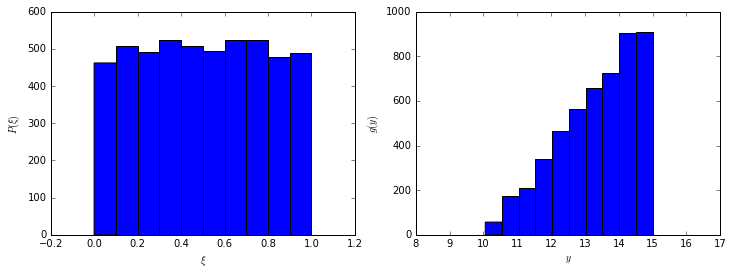

In [3]:
# Plot histograms
fig = plt.figure()
figsize = fig.get_size_inches()
figsize[0] *= 2
fig.set_size_inches(figsize)
ax1 = fig.add_subplot(121)
ax1.hist(xi)
ax1.set_xlabel('$\\xi$')
ax1.set_ylabel('$P(\\xi)$')
ax1.set_xlim(-0.2,1.2)
ax2 = fig.add_subplot(122)
ax2.hist(y)
ax2.set_xlabel('$y$')
ax2.set_ylabel('$g(y)$')
ax2.set_xlim(8,17)

## Example 2
The vertical distribution of stars in a disk galaxy is exponential in height above the galactic disk:

$$ f(z) \propto e^{-z/z_0} \qquad z \ge 0 $$

### Step 1: Normalize the pdf
Assigning the proportionality constant to $A$,
$$ f(z) = A e^{-z/z_0} \qquad z \ge 0 $$
and the normalization condition is
$$ \int_{0}^{\infty} A e^{-z/z_0}\, dz = 1 $$
$$ \left. - A z_0 e^{-z/z_0} \right|_0^{\infty} = 1 $$
$$ A = \frac{1}{z_0} $$
$$ \Rightarrow f(z) = \frac{1}{z_0} e^{-z/z_0} \qquad z \ge 0 $$

### Step 2: Equate the cumulative probabilities
$$ \int_{-\infty}^{\xi} P(\xi')\, d\xi' = \int_{-\infty}^{z} f(z')\, dz' $$
$$ \xi = 1 - e^{-z/z_0} $$

### Step 3: Invert equation to solve for the new variable
$$ e^{-z/z_0} = 1 - \xi $$
$$ -\frac{z}{z_0} = \ln(1 - \xi) $$
$$ z = -z_0 \ln(1 - \xi) $$

**Note**: If $\xi$ is a uniform random deviate, so is $1-\xi$! So whenever you see $1-\xi$ in a transformation (which often happens when exponentials are involved, like this), you can just replace it by $\xi$! You don't have to -- the expression above will work -- but I like to because it reduces the number of calculations and therefore can provide (usually very minor) speed improvements if you are doing this a **lot**.

$$ z = -z_0 \ln \xi $$

### Step 4: Prove that it worked

In [4]:
# Create 5000 samples from a uniform random deviate
N = 5000
xi = random(N)
# Transform them. Use z0=0.5
z0 = 0.5
z = -0.5 * np.log(xi)

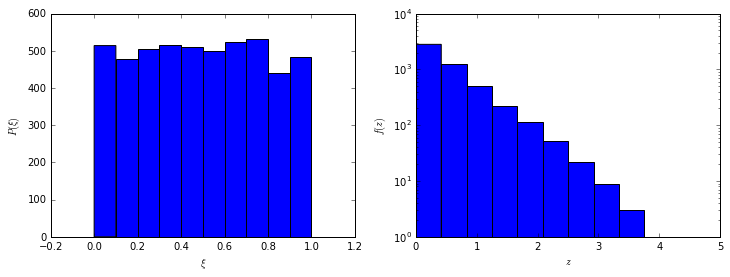

In [5]:
# Plot histograms
fig = plt.figure()
figsize = fig.get_size_inches()
figsize[0] *= 2
fig.set_size_inches(figsize)
ax1 = fig.add_subplot(121)
ax1.hist(xi)
ax1.set_xlabel('$\\xi$')
ax1.set_ylabel('$P(\\xi)$')
ax1.set_xlim(-0.2,1.2)
ax2 = fig.add_subplot(122)
ax2.hist(z)
ax2.set_xlabel('$z$')
ax2.set_ylabel('$f(z)$')
ax2.set_xlim(0,5)
ax2.set_yscale('log')

## Inverting the equation numerically
Sometimes after Step 2, you get an equation that has no closed form solution for the new variable. In these cases, you can still do the transformation by inverting the equation numerically via interpolation. For example, let's say that the equation you need to invert is
$$ \xi = e^{2a} + a $$
Although there is no closed form solution for $a$, it is not hard to numerically interpolate the equation. The first thing we need to do is look at the relationship so we understand the range of possible values of $a$. This will require some experimentation!

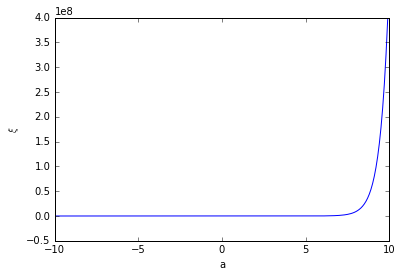

In [6]:
# Plot the relationship between xi and a. We need to sample a really broad range of a at first
# so we can make sure that we capture the relevant range of 0 < xi < 1
a_possible = np.arange(-10,10,0.1)
# What are the values of xi over this range?
xi_possible = np.exp(2.0*a_possible) + a_possible
# Plot them up and see what we get!
plt.plot(a_possible, xi_possible)
plt.xlabel('a')
plt.ylabel('$\\xi$')


Woah... clearly we've gone out way too far! Let's shrink our range of possible $a$.

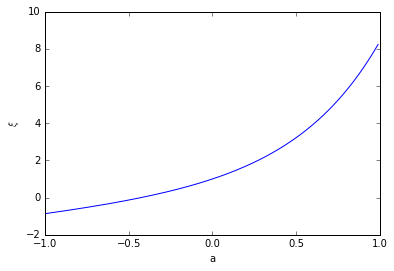

In [7]:
a_possible = np.arange(-1,1,0.01)
xi_possible = np.exp(2.0*a_possible) + a_possible
plt.plot(a_possible, xi_possible)
plt.xlabel('a')
plt.ylabel('$\\xi$')


That's better! It looks like we can cover the whole range if we restrict $a$ to the interval from -1 to +0.5 (it doesn't hurt to go slightly farther than you need).

So now we need to finely sample the relevant range.

In [8]:
# Use samples of size 0.01 for a between -1 and 0.5
a_sample = np.arange(-1, 0.5, 0.01)
# Transform to xi
xi_sample = np.exp(2.0*a_sample) + a_sample

Now that we have this relationship sampled, we can flip the axes and consider $\xi$ to be the independent variable and $a$ to be the dependent variable!

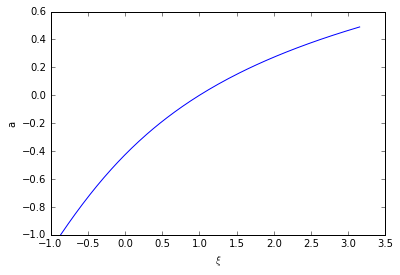

In [9]:
plt.plot(xi_sample, a_sample)
plt.xlabel('$\\xi$')
plt.ylabel('a')

From these samples, we build an interpolation function which we can use.

In [10]:
from scipy.interpolate import interp1d
a_from_xi = interp1d(xi_sample, a_sample)

Now we can go to Step 4: Prove that it worked!

In [11]:
# Create 5000 samples from a uniform random deviate
N = 5000
xi = random(N)
# Transform them
a = a_from_xi(xi)

(-0.8, 0.2)

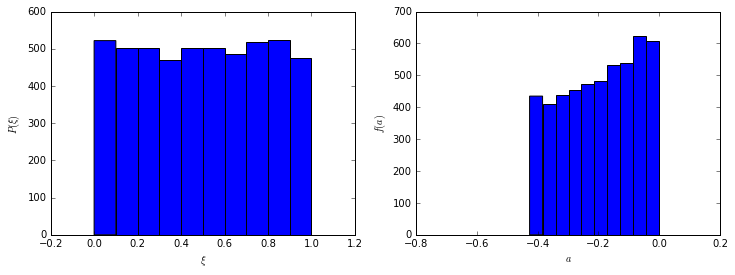

In [12]:
# Plot histograms
fig = plt.figure()
figsize = fig.get_size_inches()
figsize[0] *= 2
fig.set_size_inches(figsize)
ax1 = fig.add_subplot(121)
ax1.hist(xi)
ax1.set_xlabel('$\\xi$')
ax1.set_ylabel('$P(\\xi)$')
ax1.set_xlim(-0.2,1.2)
ax2 = fig.add_subplot(122)
ax2.hist(a)
ax2.set_xlabel('$a$')
ax2.set_ylabel('$f(a)$')
ax2.set_xlim(-0.8,0.2)

## Recreating empirical distributions
This method of using numerical interpolation to invert the cdf is extremely powerful. As long as you have the cdf, you can use it, *even if you don't know where the cdf came from*! For example, let's say you have a bunch of empirical data points, and you want to generate a new set of data that looks statistically like your empirical data, but you don't know what distribution the original data were drawn from. This sounds like it should be impossible, but it's actually quite easy!

For example, I have generated the following data samples that have an irregular but clearly structured distribution.


(array([ 2.,  1.,  1.,  1.,  3.,  0.,  0.,  0.,  0.,  7.]),
 array([  1.6 ,   2.47,   3.34,   4.21,   5.08,   5.95,   6.82,   7.69,
          8.56,   9.43,  10.3 ]),
 <a list of 10 Patch objects>)

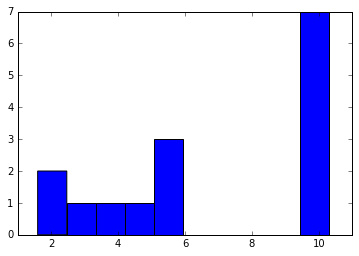

In [13]:
empirical_data = [10.1, 5.3, 2.8, 9.8, 3.6, 5.4, 9.8, 1.6, 10.3, 5.0, 9.9, 2.4, 10.2, 5.3, 10.1]
plt.hist(empirical_data)

The following bit of python code will generate the cdf of any set of data samples.

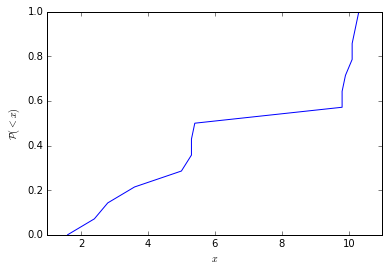

In [14]:
cdf_x = sorted(empirical_data)
cdf_y = np.arange(len(cdf_x))/float(len(cdf_x)-1)
plt.plot(cdf_x, cdf_y)
plt.xlabel('$x$')
plt.ylabel('${\cal P}(<x)$')

The fundmental transformation of probabilities is equivalent to
$$ \xi = {\cal P}(<x) $$
so we just solve this by interpolation and prove that it worked!

In [15]:
x_from_xi = interp1d(cdf_y, cdf_x)

# Create 5000 samples from a uniform random deviate
N = 5000
xi = random(N)
# Transform them
x = x_from_xi(xi)

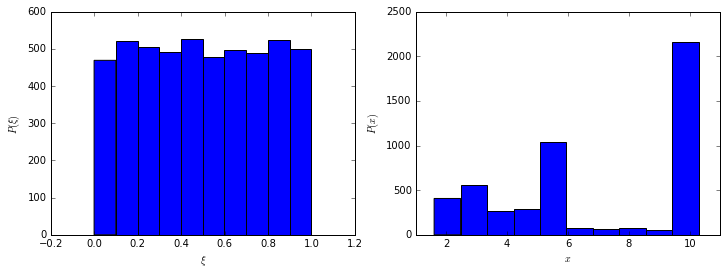

In [16]:
# Plot histograms
fig = plt.figure()
figsize = fig.get_size_inches()
figsize[0] *= 2
fig.set_size_inches(figsize)
ax1 = fig.add_subplot(121)
ax1.hist(xi)
ax1.set_xlabel('$\\xi$')
ax1.set_ylabel('$P(\\xi)$')
ax1.set_xlim(-0.2,1.2)
ax2 = fig.add_subplot(122)
ax2.hist(x)
ax2.set_xlabel('$x$')
ax2.set_ylabel('$P(x)$')

Magic!!

Note that your ability to reproduce the features in the original data is only as good as the original data. If the original data does not have enough samples to reveal fine structure, that fine structure will also be missing from your randomly generated data. It is also hard to reproduce low-probability tails correctly, again because they are often insufficiently sampled in the original data.

## Density and Probability
Often when we create particle distributions, our goal is to generate a certain *density* distribution $\rho(\vec{r})$, which is not the same as a *probability* distribution.

Consider the mass $dM$ in an infinitessimal volume $d^3r$:
$$ dM = \rho(\vec{r})\, d^3r $$
If we sample the density distribution using $N$ particles of mass $m$, which are distributed according to a pdf $P(a_1, a_2, a_3)$ in 3 coordinates (which could be $x$, $y$, $z$ if working in Cartesian coordintes, but could also be $r$, $\theta$, $\phi$ in spherical coordiantes, etc), then that mass is also given by
$$ dM = N m \, P(a_1, a_2, a_3) \, da_1\, da_2\, da_3 $$

For example, consider working in spherical coordinates, and trying to sample an isothermal density distribution:
$$ \rho(r) \propto r^{-2} $$
Looking at the two definitions of $dM$:
$$ dM = A r^{-2} d^3r = A r^{-2} \, r^2\, \sin\theta\, d\theta\, d\phi\, dr $$
$$ = N m \, P(r, \theta\, \phi)\, dr\, d\theta\, d\phi $$

Ignoring the normalization constant, which depends on the number of particles that you are sampling, it is clear that we can break the pdf $P(r, \theta, \phi)$ into individual pdfs for each coordinate on its own:
$$ P(r, \theta, \phi) = P(r)\, P(\theta)\, P(\phi) $$
where
$$ P(r) = 1 $$
$$ P(\theta) = \sin\theta $$
$$ P(\phi) = 1 $$
**Note**: $P(r)=1$ means that $r$ is a uniform random deviate, even though the density falls off as $r^{-2}$, because of the $r^2$ increase in the volume element!